# Artificial Neural Network (ANN) example

---

“Churn” dataset that is available in the UCIMachine Learning Repository:
<br>
https://canvas.ucdavis.edu/courses/553693/files/12846113?wrap=1
<br>
> **Introduction of variables:**
<br>
#State: Categorical, for the 50 states and the District of Columbia
<br>
#Account Length: Integer-valued, how long account has been active
<br>
#Area code: Categorical
<br>
#Phone Number: Essentially a surrogate for customer ID
<br>
#International Plan: Dichotomous categorical, yes or no
<br>
#Voice Mail Plan: Dichotomous categorical, yes or no
<br>
#Number of Voice Mail Messages: Integer-valued
<br>
#Total Day Minutes: Continuous,minutes customer used service during the day
<br>
#Total Day Calls: Integer-valued
<br>
#Total Day Charge: Continuous, perhaps based on above two variables
<br>
#Total Eve Minutes: Continuous, minutes customer used service during the evening
<br>
#Total Eve Calls: Integer-valued
<br>
#Total Eve Charge: Continuous, perhaps based on above two variables
<br>
#Total Night Minutes: Continuous, minutes customer used service during the night
<br>
#Total Night Calls: Integer-valued
<br>
#Total Night Charge: Continuous, perhaps based on above two variables
<br>
#Total International Minutes: Continuous, minutes customer used service to make international calls
<br>
#Total International Calls: Integer-valued
<br>
#Total International Charge: Continuous, perhaps based on above two variables
<br>
#Number of Calls to Customer Service: Integer-valued
<br>
#Churn: Target. Indicator of whether the customer has left the company (True or False)

---

### Import the dataset
**Note:** Try edit the import directory if you cannot import the dataset.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('churn.txt')

print("Shape of 'churn.txt' data:", df.shape) # Have an overlook on the shape of the data.
df.head(3)                                     # Have an overlook on the first few of rows.

Shape of 'churn.txt' data: (3333, 21)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


---

### Pre-process the dataset
#### Procedure:
<br>
&emsp;&emsp;1. find outliers and delete outliers from the dataset.
<br>
&emsp;&emsp;2. remove correlated features from the whole dataset according to Seaborn heatmap.
<br>
&emsp;&emsp;3. split the dataset into training set and testing set.
<br>
&emsp;&emsp;4. normalize the numeric data in training set
<br>
&emsp;&emsp;5. encode categorical data in both training and testing set.

#### 1. Find outliers and then delete outliers from the whole dataset. 
The two outlier detection algorithms used here are One-Class SVM and Isolation Forest.
<br>
&emsp;&emsp;According to One-Class SVM, there are 166 datapoints outlied other agglomerate datapoints; other 3167 datapoints are relatively agminated. 
<br>
&emsp;&emsp;According to the Isolation-Forest, there are 267 datapoints outlied other agglomerate datapoints; other 3066 datapoints are relatively agminated. 
<br>
<br>
After comparison, One-Class SVM is used for dropping outliers.

In [2]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

detector1 = OneClassSVM(nu=0.05) # nu is the percentage of data respect to outliers.
detector2 = IsolationForest(n_jobs=-1) # n_job = -1 means the entire CPU used to speed up.

predicted1 = detector1.fit_predict(df[['Account Length', 'VMail Message', 
                                       'Day Mins', 'Day Calls', 'Day Charge', 
                                       'Eve Mins', 'Eve Calls', 'Eve Charge', 
                                       'Night Mins', 'Night Calls', 'Night Charge', 
                                       'Intl Mins', 'Intl Calls', 'Intl Charge', 
                                       'CustServ Calls']])
                  
predicted2 = detector2.fit_predict(df[['Account Length', 'VMail Message', 
                                       'Day Mins', 'Day Calls', 'Day Charge', 
                                       'Eve Mins', 'Eve Calls', 'Eve Charge', 
                                       'Night Mins', 'Night Calls', 'Night Charge', 
                                       'Intl Mins', 'Intl Calls', 'Intl Charge', 
                                       'CustServ Calls']])

print("SVM:")
print(pd.crosstab(predicted1, columns=['count']))
print("Isolation Forest:")
print(pd.crosstab(predicted2, columns=['count']))

SVM:
col_0  count
row_0       
-1       166
 1      3167
Isolation Forest:
col_0  count
row_0       
-1       285
 1      3048


In [3]:
svm_outcome = np.where(predicted1 == -1)
if_outcome = np.where(predicted2 == -1)
svm_if_intersection = np.intersect1d(svm_outcome, if_outcome)
print("SVM vs IF")
print(f"Size of intersection: {len(svm_if_intersection)}")

SVM vs IF
Size of intersection: 97


In [4]:
#Dropping SVM outliers
print(f"Size before dropping outlier(s): {len(df)}")
df_clean = df.drop(svm_outcome[0])
print(f"Size after dropping outlier(s): {len(df_clean)}")

Size before dropping outlier(s): 3333
Size after dropping outlier(s): 3167


#### 2. Remove correlated features from the whole dataset according to Seaborn heatmap. 
According to the heat map, highy correlated features are:
<br>
&emsp;&emsp;'Day Charge' and 'Day Mins';
<br>
&emsp;&emsp;'Eve Charge' and 'Eve Mins';
<br>
&emsp;&emsp;'Night Charge' and 'Night Mins'
<br>
&emsp;&emsp;'Intl Charge' and 'Night Mins'
<br>
<br>
Here I decide to ignore all 'Charge' features. So I did not include any 'Charge' features in training and testing set, but they are kept in dataframe df_clean.

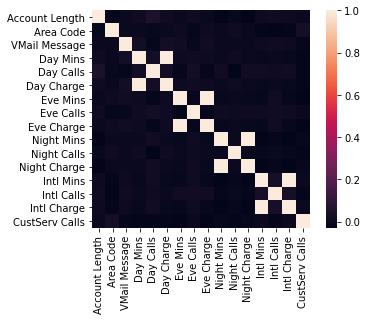

In [5]:
import seaborn as sns
g = sns.heatmap(df_clean.corr(),annot=False,  square=True)

In [6]:
# Reset the datframe, ignore all 'Cahrge' features.
df_clean = df_clean[['State', 'Account Length', 'Area Code', 'Phone', 
                     'Int\'l Plan', 'VMail Plan', 'VMail Message', 
                     'Day Mins', 'Day Calls',
                     'Eve Mins', 'Eve Calls',
                     'Night Mins', 'Night Calls',
                     'Intl Mins', 'Intl Calls',
                     'CustServ Calls', 
                     'Churn?']]

In [7]:
# Have look at reseted features.
df_clean.head(1)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.


#### 3. Split the dataset into training set and testing set. 
Dependent variable is 'Churn?', and all other useful features are independent variables.

In [8]:
from sklearn.model_selection import train_test_split

# Features (Independent Variables)
X = df_clean[['State', 'Account Length', 'Area Code', 'Phone', 
              'Int\'l Plan', 'VMail Plan', 'VMail Message', 
              'Day Mins', 'Day Calls',
              'Eve Mins', 'Eve Calls',
              'Night Mins', 'Night Calls',
              'Intl Mins', 'Intl Calls',
              'CustServ Calls']]

# Dependent Variables
Y = df_clean['Churn?']

# Split the data into 70% train set and 30% test set.
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.3)

#### 4. Normalize the numeric data in training set .
Normalize all numerical variables (15 numerical-type features).
<br>
Compress all the data to numbers between 0 and 1 by using Mini-Max Scaler.
<br>
**Note:** There will be a warning pop-up, but it does not affect the output.

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Extract all numerical data.
# There are totally 15  numerical-type features.
numeric_x_train = x_train[['Account Length', 'VMail Message', 
                           'Day Mins', 'Day Calls', 
                           'Eve Mins', 'Eve Calls', 
                           'Night Mins', 'Night Calls', 
                           'Intl Mins', 'Intl Calls',
                           'CustServ Calls']]

# Implement Min-Max Scaler:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(numeric_x_train)
numeric_x_train = scaled_values

# Apply scaled (normalized) data to the original dataframe df.
x_train.loc[: ,['Account Length', 'VMail Message', 
                'Day Mins', 'Day Calls', 
                'Eve Mins', 'Eve Calls', 
                'Night Mins', 'Night Calls',
                'Intl Mins', 'Intl Calls',
                'CustServ Calls']] = numeric_x_train

/Users/liubohan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [10]:
# And have a look at the normalized data.
x_train[['Account Length', 'VMail Message', 
         'Day Mins', 'Day Calls', 
         'Eve Mins', 'Eve Calls', 
         'Night Mins', 'Night Calls', 
         'Intl Mins', 'Intl Calls',
         'CustServ Calls']].head()

,Account Length,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls
1464,0.303571,0.000000,0.516249,0.407407,0.610922,0.564103,0.583501,0.491935,0.450,0.25,0.333333
277,0.638393,0.941176,0.537915,0.488889,0.221160,0.352564,0.537223,0.588710,0.325,0.10,0.222222
1180,0.316964,0.000000,0.598849,0.459259,0.467918,0.628205,0.438632,0.733871,0.655,0.20,0.000000
308,0.495536,0.000000,0.553487,0.525926,0.449488,0.448718,0.433937,0.596774,0.570,0.10,0.000000
1067,0.522321,0.000000,0.529790,0.496296,0.406826,0.493590,0.601610,0.516129,0.610,0.30,0.111111


#### 5. Encode categorical data in both training and testing set.
After normalizing numeric data, then encoding categorical data.
<br>
There are two kinds of categorical features in this dataset:
<br>
&emsp;&emsp;Nominal features, which is encoded by either One-Hot encoder or Label Encoder here.
<br>
&emsp;&emsp;Binary features, which is encoded by converting 't'/'f' string to int 0/1.
<br>
The reason that I do not use Ordinal Encoder is these are Nominal features without order or sequence.

>Below is an example of using the One-Hot encoder to encode the 'State' feature. 
<br>
**Note:** There will be a warning pop-up, but it does not matter here, since the 'State' feature will be dropped later.

In [11]:
import category_encoders as ce

X = x_train['State']

ce_one_hot = ce.OneHotEncoder(cols=['State'])
ce_one_hot.fit_transform(X).head(3)

/Users/liubohan/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,State_9,State_10,...,State_42,State_43,State_44,State_45,State_46,State_47,State_48,State_49,State_50,State_51
1464,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1180,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


>Below is an example of using the Label Encoder to encode the 'Area Code' feature. 
<br>
However, it is better to use the One-Hot encoder here. 
<br>
Label Encoder is better used when dealing with ordinal data. 
<br>
(If we dealing with area code with sequential order, then Label Encoder could be a better choice.)
<br>
**Note:** this is just an example of using Label Encoder, the 'Area Code' feature will also be dropped later.

In [12]:
from sklearn.preprocessing import LabelEncoder

X = x_train['Area Code']

# Dealing with Nominal features.
# Using Label Encoder converting the same strings to a same integer.
le = LabelEncoder()
le.fit(X)
label = le.transform(X)
X = label

In [13]:
# Have a look at the encoded 'Area Code' feature.
X_df = pd.DataFrame(X, columns=['Area Code'])
X_df.head(3)

,Area Code
0,1
1,0
2,1


>The rest of the dataset are all Ture/False data, binary type of data. 
<br>
('Phone' feature is ignored. Although it can be processed by One-Hot, it will generate a large table with no repetition, and it is useless for predicting 'Churn?'.)
<br>
Below is the process of converting True/False to 1/0.

In [14]:
# Dealing with Binary features.
# For each Binary feature:
#     if its value is 'True' or 'yes', convert the value to int 1.
#     if its value is 'False' or 'no', convert the value to int 0.

# Process Binary features in train set.
for i in x_train[['Int\'l Plan', 'VMail Plan']]:
    for j in range(len(x_train)):
        if x_train[i].iloc[j] == 'True.' or x_train[i].iloc[j] == 'yes':
            x_train[i].iloc[j] = 1
        elif x_train[i].iloc[j] == 'False.' or x_train[i].iloc[j] == 'no':
            x_train[i].iloc[j] = 0

# Also process Binary features in test set.
# Since the program does not recognize string'True/False' and 'yes/no'.
for i in x_test[['Int\'l Plan', 'VMail Plan']]:
    for j in range(len(x_test)):
        if x_test[i].iloc[j] == 'True.' or x_test[i].iloc[j] == 'yes':
            x_test[i].iloc[j] = 1
        elif x_test[i].iloc[j] == 'False.' or x_test[i].iloc[j] == 'no':
            x_test[i].iloc[j] = 0

# Do the same Binary procedure for Dependent Variable y (Train set).
for i in range(len(y_train)):
    if y_train.iloc[i] == 'True.' or y_train.iloc[i] == 'yes':
        y_train.iloc[i] = 1
    elif y_train.iloc[i] == 'False.' or y_train.iloc[i] == 'no':
        y_train.iloc[i] = 0    
# Do the same Binary procedure for Dependent Variable y (Test set).
for i in range(len(y_test)):
    if y_test.iloc[i] == 'True.' or y_test.iloc[i] == 'yes':
        y_test.iloc[i] = 1
    elif y_test.iloc[i] == 'False.' or y_test.iloc[i] == 'no':
        y_test.iloc[i] = 0

/Users/liubohan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#### View the processed data below

In [15]:
# Have a look at the encoded data.
x_train[['Int\'l Plan', 'VMail Plan']].head(2)

,Int'l Plan,VMail Plan
1464,0,0
277,0,1


In [16]:
# Have a look at the encoded data.
x_test[['Int\'l Plan', 'VMail Plan']].head(2)

,Int'l Plan,VMail Plan
1699,0,0
2972,0,1


In [17]:
# Have a look at the encoded data.
y_train.head(2)

1464    0
277     1
Name: Churn?, dtype: object

In [18]:
# Have a look at the encoded data.
y_test.head(2)

1699    0
2972    1
Name: Churn?, dtype: object

---

### Build the Feed-Forward-Multilayer Perceptron
Aim to perform binary classification to classify 'Churn' based on other variables

Clear up the portion of the dataset.
<br>
Features may useful to put into the Artificial Neural Network:
<br>
'Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls', 'CustServ Calls'

In [19]:
x_train = x_train[['Account Length',
                   'VMail Message', 
                   'Day Mins', 'Day Calls', 
                   'Eve Mins', 'Eve Calls', 
                   'Night Mins', 'Night Calls', 
                   'Intl Mins', 'Intl Calls',
                   'CustServ Calls']]

x_test = x_test[['Account Length',
                 'VMail Message', 
                 'Day Mins', 'Day Calls', 
                 'Eve Mins', 'Eve Calls', 
                 'Night Mins', 'Night Calls', 
                 'Intl Mins', 'Intl Calls',
                 'CustServ Calls']]

Look over the information of each feature.

In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 1464 to 1891
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  2216 non-null   float64
 1   VMail Message   2216 non-null   float64
 2   Day Mins        2216 non-null   float64
 3   Day Calls       2216 non-null   float64
 4   Eve Mins        2216 non-null   float64
 5   Eve Calls       2216 non-null   float64
 6   Night Mins      2216 non-null   float64
 7   Night Calls     2216 non-null   float64
 8   Intl Mins       2216 non-null   float64
 9   Intl Calls      2216 non-null   float64
 10  CustServ Calls  2216 non-null   float64
dtypes: float64(11)
memory usage: 207.8 KB


In [21]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 1699 to 2235
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  951 non-null    int64  
 1   VMail Message   951 non-null    int64  
 2   Day Mins        951 non-null    float64
 3   Day Calls       951 non-null    int64  
 4   Eve Mins        951 non-null    float64
 5   Eve Calls       951 non-null    int64  
 6   Night Mins      951 non-null    float64
 7   Night Calls     951 non-null    int64  
 8   Intl Mins       951 non-null    float64
 9   Intl Calls      951 non-null    int64  
 10  CustServ Calls  951 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 89.2 KB


Using tensorflow.keras to form a Sequential ANN.
<br>
There are four layers in this ANN: input layer + 2 hidden layers + output layer.
<br>
&emsp;&emsp;For the input layers, there should be 11 nodes, since there are 11 input features.
<br>
&emsp;&emsp;For the two hidden layers, there are 4 nodes in each layer. Too many nodes will increase the training time.
<br>
&emsp;&emsp;For the output layer, there is only 1 node, since there is only one feature 'Churn?' to output.
<br>
All layers using sigmoid function (1/(1+e^(-x))) as activation function.

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(4, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(layers.Dense(4,  activation='sigmoid'))
model.add(layers.Dense(1,  activation='sigmoid'))

In [23]:
model.compile(loss='mse', optimizer='adam', 
              metrics=['accuracy', 
                       keras.metrics.Precision(name="precision", thresholds=0.5),
                       keras.metrics.Recall(name="recall", thresholds=0.5)
                      ])

---

### Train the FFNN model with Back-Propagation
Train the FNN model using training set with Back-Propagation to find the best weight parameter.
<br>
Show how the weight parameters of the last layer change during Back-Propagation in the graph below.
<br>
**Note:** The graph indicates the connection's weight value from the second hidden layer (4 nodes) to the output layer (1 node), so there are 4 connections respective to the graph.
>Back-propagation is an efficient technique for evaluating the gradient of an error function for a FFNN.
<br>
This technique is achieved through a message-passing scheme in which information is sent alternately forwards and backwards through the network.

In [24]:
class FitCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        weights.append(self.model.layers[1].get_weights())
        
weights = []

<AxesSubplot:>

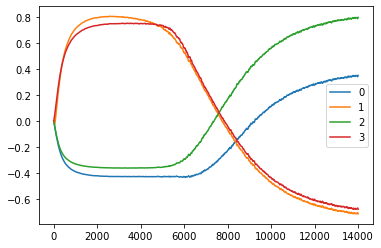

In [25]:
x_array = np.asarray(x_train)
y_array = np.asarray(y_train).astype('float64')

result = model.fit(x_array, y_array, epochs=200, batch_size=32, verbose=0, callbacks=[FitCallback()])

pd.DataFrame([x[-1] for x in weights]).plot()

---

### Test and Evaluation of the model

Below reports loss, accuracy, precision and recall score for the test set

In [26]:
x_array = np.asarray(x_test)
y_array = np.asarray(y_test).astype('float64')

score = model.evaluate(x_array, y_array)

print(" ")
print("Loss:", score[0])
print("Accuracy:", score[1])
print("Precision:", score[2])
print("Recall:", score[3])

30/30 [==============================] - 0s 892us/step - loss: 0.3870 - accuracy: 0.1420 - precision: 0.1420 - recall: 1.0000
 
Loss: 0.3870352804660797
Accuracy: 0.14195583760738373
Precision: 0.14195583760738373
Recall: 1.0


---

### Train and Test the model with the whole data

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(4, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(layers.Dense(4,  activation='sigmoid'))
model.add(layers.Dense(1,  activation='sigmoid'))

In [28]:
X = df_clean[['Account Length',
              'VMail Message', 
              'Day Mins', 'Day Calls', 
              'Eve Mins', 'Eve Calls', 
              'Night Mins', 'Night Calls', 
              'Intl Mins', 'Intl Calls',
              'CustServ Calls']]

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(X)
X = scaled_values


Y = df_clean['Churn?']

for i in range(len(Y)):
    if Y.iloc[i] == 'True.' or Y.iloc[i] == 'yes':
        Y.iloc[i] = 1
    elif Y.iloc[i] == 'False.' or Y.iloc[i] == 'no':
        Y.iloc[i] = 0

/Users/liubohan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [29]:
model.compile(loss='mse', optimizer='adam', 
              metrics=['accuracy', 
                       keras.metrics.Precision(name="precision", thresholds=0.5),
                       keras.metrics.Recall(name="recall", thresholds=0.5)])

In [30]:
class FitCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        weights.append(self.model.layers[1].get_weights())

In [31]:
weights = []

<AxesSubplot:>

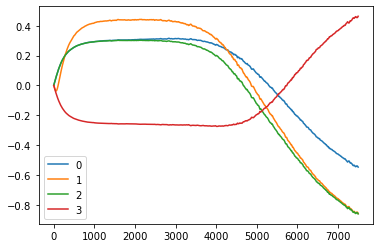

In [32]:
x_array = np.asarray(X)
y_array = np.asarray(Y).astype('float64')

result = model.fit(x_array, y_array, epochs=150, batch_size=64, verbose=0, callbacks=[FitCallback()])

pd.DataFrame([x[-1] for x in weights]).plot()

In [33]:
model.evaluate(x_array, y_array)

99/99 [==============================] - 0s 737us/step - loss: 0.1074 - accuracy: 0.8626 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.10735641419887543, 0.8626460433006287, 0.0, 0.0]